<a href="https://colab.research.google.com/github/YS-JEOUNG/amazon-review-project/blob/main/code/artscrafts_code/artscrafts_eda_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# array & decompress the file
import numpy as np
import pandas as pd
import gzip

# visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

# datetime
from datetime import datetime

In [ ]:
# text preprocessing
import sys
!{sys.executable} -m pip install spacy
import spacy
!{sys.executable} -m spacy download en
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
!{sys.executable} -m pip install -U contractions
import unicodedata
tokenizer = ToktokTokenizer
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer

# warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\STU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
  ERROR: Command errored out with exit status 1:
   command: 'C:\dev\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\STU\\AppData\\Local\\Temp\\pip-install-nmazga_u\\pyahocorasick\\setup.py'"'"'; __file__='"'"'C:\\Users\\STU\\AppData\\Local\\Temp\\pip-install-nmazga_u\\pyahocorasick\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\STU\AppData\Local\Temp\pip-wheel-x6oad_cg'
       cwd: C:\Users\STU\AppData\Local\Temp\pip-install-nmazga_u\pyahocorasick\
  Complete output (5 lines):
  running bdist_wheel
  running build
  running build_ext
  building 'ahocorasick' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Mic

  Using cached contractions-0.0.48-py2.py3-none-any.whl (6.4 kB)
  Using cached textsearch-0.0.21-py2.py3-none-any.whl (7.5 kB)
  Using cached pyahocorasick-1.4.2.tar.gz (321 kB)
  Running setup.py clean for pyahocorasick
Failed to build pyahocorasick
    Running setup.py install for pyahocorasick: started
    Running setup.py install for pyahocorasick: finished with status 'error'


In [ ]:
df = pd.read_csv('C:/Users/STU/Desktop/arts_total_cleaned.csv')

In [ ]:
df = df.drop(['date'], axis=1)

In [ ]:
df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130133 entries, 0 to 130132
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   overall           130133 non-null  float64       
 1   vote              130133 non-null  int64         
 2   verified          130133 non-null  bool          
 3   reviewer_id       130133 non-null  object        
 4   asin              130133 non-null  object        
 5   style             130133 non-null  object        
 6   reviewer_name     130128 non-null  object        
 7   unix_review_time  130133 non-null  int64         
 8   category          130133 non-null  object        
 9   description       130133 non-null  object        
 10  title             130133 non-null  object        
 11  brand             129770 non-null  object        
 12  rank              130133 non-null  object        
 13  main_cat          129791 non-null  object        
 14  pric

In [ ]:
# function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# apply length function to create review length feature
df['review_length'] = df['review_text'].apply(length)
df.head()

,overall,vote,verified,reviewer_id,asin,style,reviewer_name,unix_review_time,category,description,title,brand,rank,main_cat,price,review_text,rating_class,time,clean_text,review_length
0,5.0,9,True,APVFJYDRTYNK5,886293162X,{'Format:': ' Paperback'},Mrs. Sally L. C. Marsh,1290816000,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['The new Volant Address Book has ruled pages ...,"Moleskine Volant Address Book, Large, Magenta,...",Moleskine,"['>#514,989 in Office Products (See top 100)',...",Office Products,NaN,"Nice and perfect for an address book Thin, you...",good,2010-11-27,nice perfect address book thin could slide dra...,55
1,4.0,69,True,A3BQSWC3801JNI,8862933177,{'Format:': ' Hardcover'},Stacy A. Jones,1267660800,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,"Solid buy, few small gripes about page layout ...",good,2010-03-04,solid buy small grip page layout honest alread...,367
2,5.0,5,True,A1RY2FJR0TVP85,8862933177,{'Format:': ' Hardcover'},N. M. Patterson,1267056000,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,Cool place to Catalog Your Recipes I purchased...,good,2010-02-25,cool place catalog recipes purchase recipe jou...,142
3,2.0,2,True,A12GULZW3W4W3P,8862933177,{'Format:': ' Hardcover'},Jazz,1499299200,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,Its ok read for specifications I did not like ...,bad,2017-07-06,ok read specifications not like really like mo...,226
4,5.0,2,True,A2G1BD6F2WR4YW,8862933177,{'Format:': ' Hardcover'},rrobey619,1498003200,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,Great for Chefs. I'm a chef and I was looking ...,good,2017-06-21,great chefs chef look book jot quick ideas ins...,44


In [ ]:
# 크기 줄이기 위해서 review_length 150 -> 100자 초과로
df = df.drop(df[(df['review_length'] > 100) & (df['rating_class'] == 'good')].index)

In [ ]:
# create 'year' column
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year

In [ ]:
# 크기 줄이기 위해서 15_000 -> 5_000개로, 2010 -> 2015로
df = df.drop(df[(df['year'] < 2015)].index)
df = df.head(5_000)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 3 to 6119
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   overall           1951 non-null   float64       
 1   vote              1951 non-null   int64         
 2   verified          1951 non-null   bool          
 3   reviewer_id       1951 non-null   object        
 4   asin              1951 non-null   object        
 5   style             1951 non-null   object        
 6   reviewer_name     1951 non-null   object        
 7   unix_review_time  1951 non-null   int64         
 8   category          1951 non-null   object        
 9   description       1951 non-null   object        
 10  title             1951 non-null   object        
 11  brand             1930 non-null   object        
 12  rank              1951 non-null   object        
 13  main_cat          1951 non-null   object        
 14  price             1787 n

In [ ]:
df['review_length'].describe()

count    5000.000000
mean       70.197000
std        51.175635
min         3.000000
25%        37.000000
50%        60.000000
75%        92.000000
max       967.000000
Name: review_length, dtype: float64

In [ ]:
df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})

In [ ]:
# create a new dataframe with clean text and rating class number
df1 = df[['clean_text', 'rating_class_num']].reset_index()
df1.head(10)

,index,clean_text,rating_class_num
0,3,ok read specifications not like really like mo...,0
1,4,great chefs chef look book jot quick ideas ins...,1
2,5,great journal thing mark previous great journa...,1
3,6,perfect nice recipe keeper good kitchen use wa...,1
4,7,nice idea paper quality may issue big fan mole...,1
5,11,great motivation buy moleskine wellness journa...,1
6,12,journal great expect elastic strap journal gre...,1
7,13,ohh love recipe book ohh love recipe book exci...,1
8,23,nice layout not enough space recipe book would...,0
9,24,great idea moleskine great idea moleskine alph...,1


In [ ]:
# initialize the countervectorizer
countVec = CountVectorizer(ngram_range=(1, 2), binary=True)

In [ ]:
# fit the clean_text to countvectorizer
countVec.fit(df1['clean_text'])

CountVectorizer(binary=True, ngram_range=(1, 2))

In [ ]:
# transform the matrix
transfomred_matrix = countVec.transform(df1['clean_text'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1951 non-null   int64 
 1   clean_text        1951 non-null   object
 2   rating_class_num  1951 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 45.9+ KB


In [ ]:
# convert matrix to array
a = transfomred_matrix.toarray()

In [ ]:
# Extracting the feature names
names = countVec.get_feature_names()

In [ ]:
# Adding a 'rating' column from previous dataframe's rating value
df2 = pd.DataFrame(a, columns=names)
df2['rating'] = df1['rating_class_num']

In [ ]:
df2['rating'].head()

0    0
1    1
2    1
3    1
4    1
Name: rating, dtype: int64

In [ ]:
df2.head(10)

,abide,abide rule,ability,ability cut,ability hold,ability trim,ability work,able,able clean,able complete,...,zipper pull,zipper recommend,zipper replace,zipper roll,zipper schott,zipper seehems,zipper sliders,zipper sons,zipper work,rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Create lists for forming a dataframe summary
# 어차피 rating_count 수 적은 건 필요 없을테니 아예 여기에서 20회 초과만 포함시키기로 함
feature_names = []
avg_ratings = []
rating_counts = []
for name in names:
    if name != 'rating':
        avg_rating = df2[df2[name]==1]['rating'].mean()
        rating_count = df2[df2[name]==1]['rating'].count()
        if rating_count > 20:
            feature_names.append(name)
            avg_ratings.append(avg_rating)
            rating_counts.append(rating_count)

In [ ]:
# create a new dataframe from words, average ratings, and rating counts
df_summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating':avg_ratings, 'rating_count':rating_counts})

In [ ]:
df_summary

,feature_name,avg_rating,rating_count
0,able,0.500000,48
1,absolutely,0.653846,26
2,actually,0.340000,50
3,add,0.815789,38
4,adhesive,0.619048,21
...,...,...,...
477,year,0.633333,60
478,year old,0.600000,25
479,years,0.640625,64
480,yellow,0.428571,21


In [ ]:
# Good rating words
# words that are commonly used in the reviews which have good ratings
df_good = df_summary.sort_values(by='avg_rating', ascending=False)[4:50]
df_good.head(50)

,feature_name,avg_rating,rating_count
109,easy use,0.945455,55
12,amaze,0.944444,36
160,great product,0.942857,35
149,fun,0.941176,34
133,favorite,0.935484,31
143,five,0.931034,116
441,use make,0.928571,28
446,vibrant,0.925000,40
174,highly recommend,0.921053,38
465,work great,0.915663,83


In [ ]:
wc_good = dict(zip(df_good['feature_name'].tolist(), df_good['avg_rating'].tolist()))

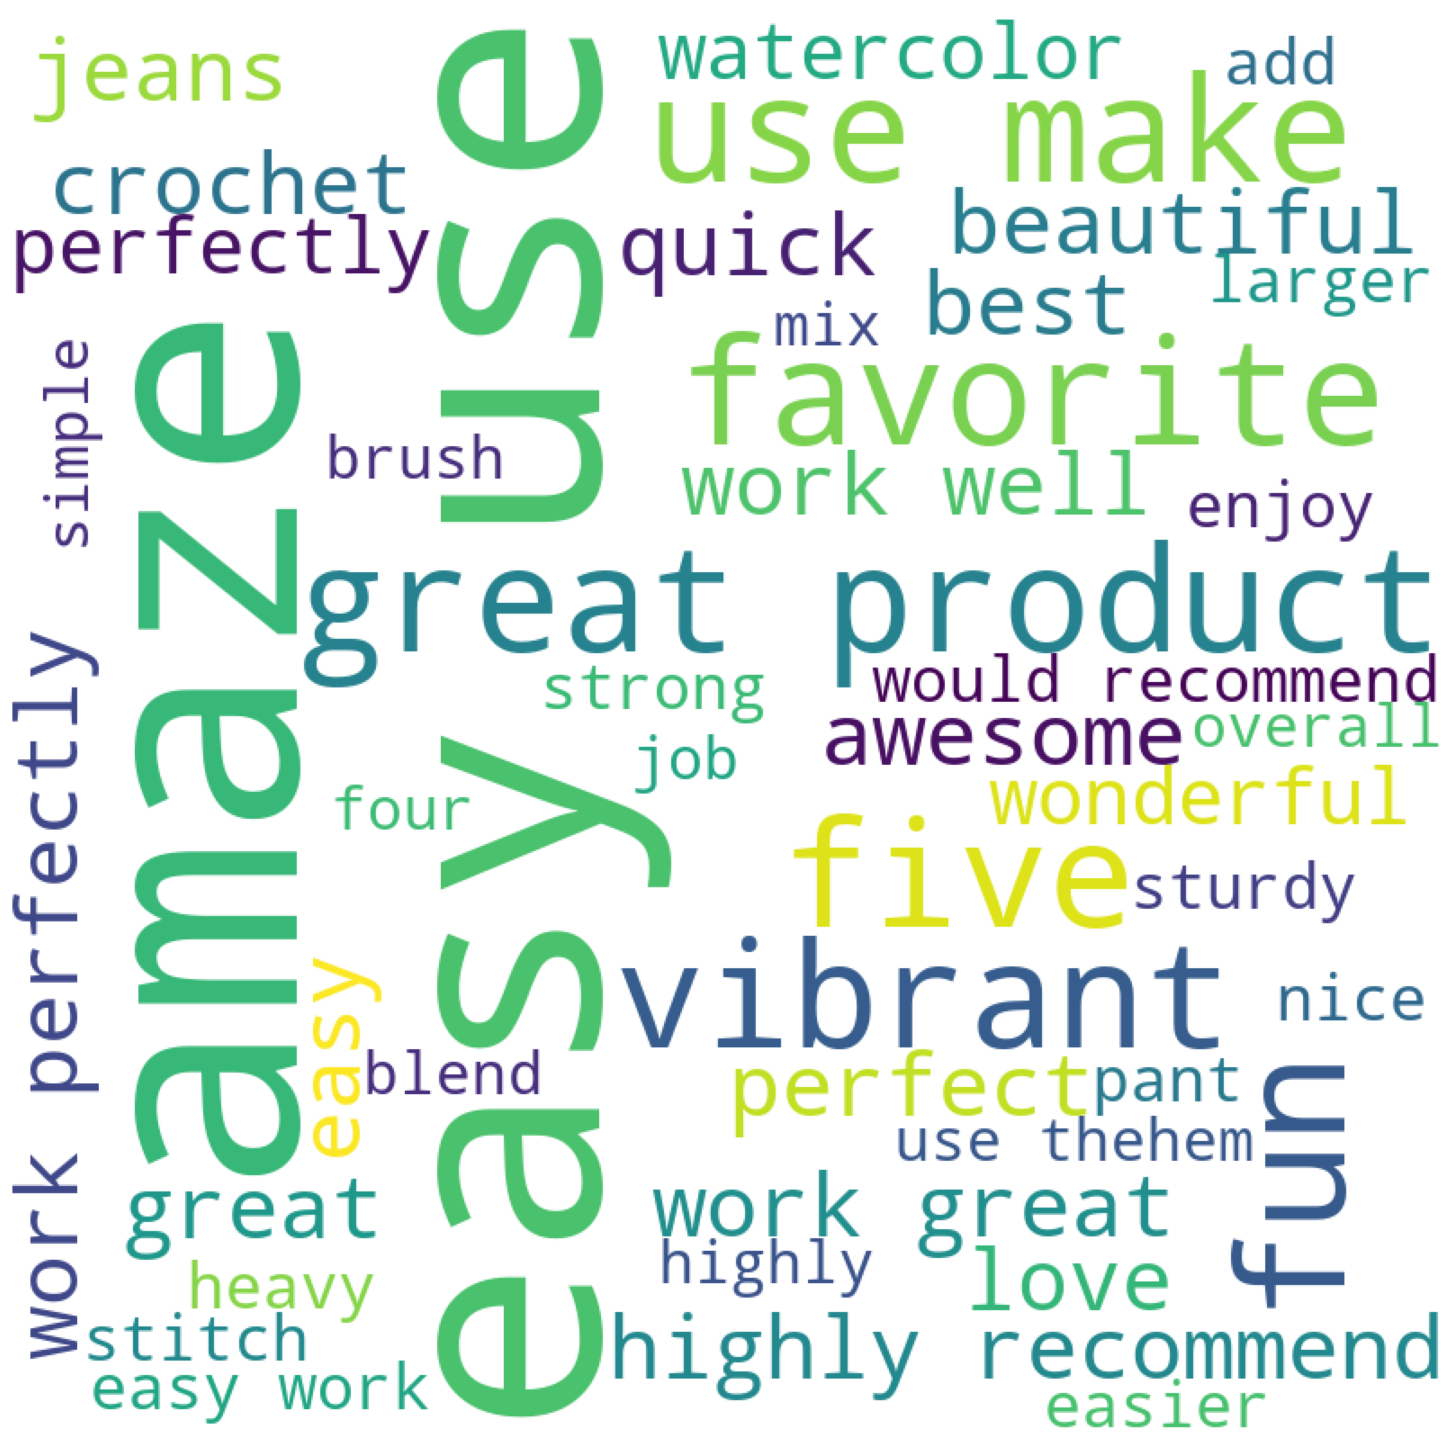

In [ ]:
# generate a wordcloud image
wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     min_font_size=10).generate_from_frequencies(wc_good)

plt.figure(figsize=(20, 20), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Bad rating words
# words that are commonly used in the reviews which have bad ratings
df_bad = df_summary.sort_values(by='avg_rating', ascending=True)[:12]

In [ ]:
df_bad.sort_values(by=['avg_rating'], ascending=False, inplace=True)
df_bad

,feature_name,avg_rating,rating_count
264,not cut,0.103448,29
444,useless,0.096774,31
427,today,0.095238,21
434,try use,0.090909,22
262,not buy,0.086957,46
346,return,0.072464,69
312,poor quality,0.045455,22
181,horrible,0.045455,22
410,terrible,0.037037,27
450,waste,0.036364,55


In [ ]:
wc_bad = dict(zip(df_bad['feature_name'].tolist(), df_bad['avg_rating'].tolist()))

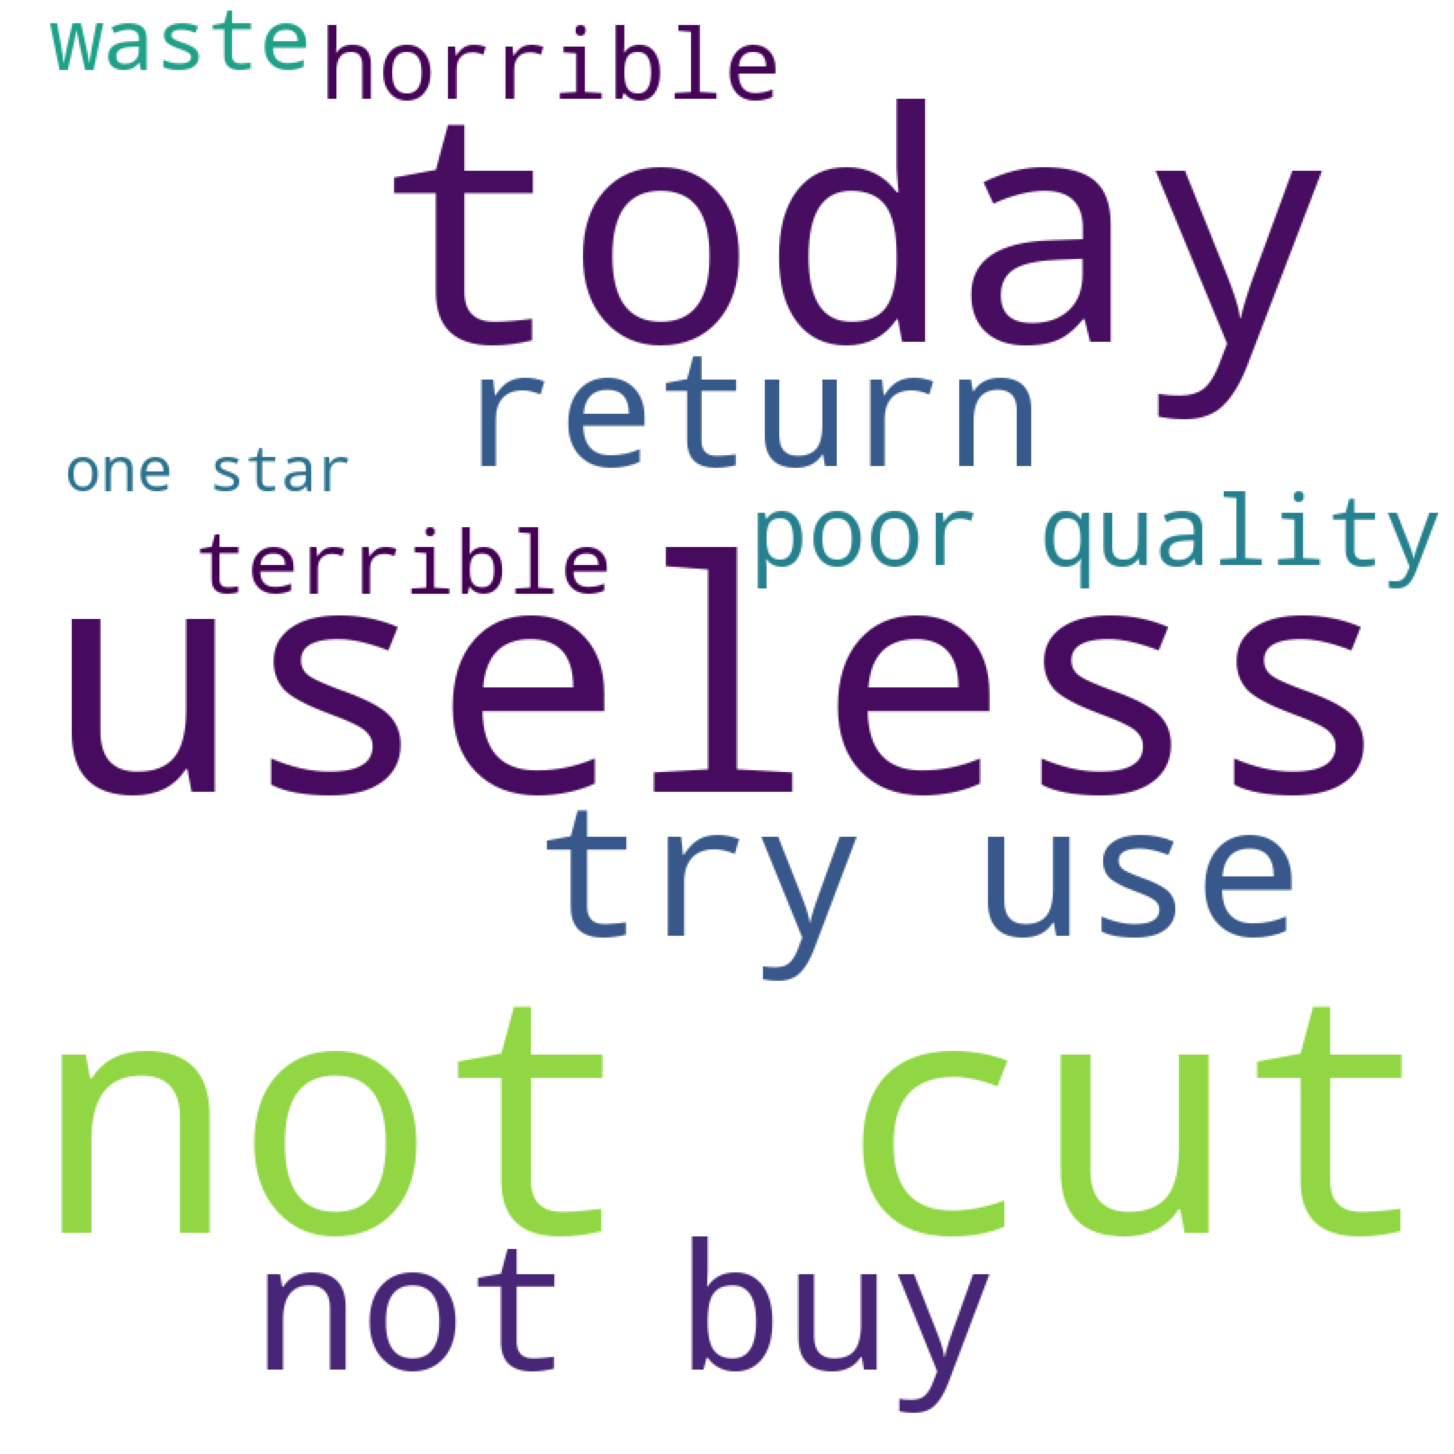

In [ ]:
# generate a wordcloud image
wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     min_font_size=10).generate_from_frequencies(wc_bad)

plt.figure(figsize=(20, 20), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()